In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv("/content/drive/MyDrive/laterite_mobilemoney_data.csv")

In [4]:
df['hhid'].nunique()

1205

In [5]:
df['account_type_index'] = df.groupby('hhid').cumcount()

In [ ]:
print(df.pivot(index='hhid',columns='account_type_index')[['account_type']])

                     account_type                 ...                   
account_type_index              0              1  ...             3    4
hhid                                              ...                   
1001                 Mobile Money   Bank Account  ...           NaN  NaN
1002                SACCO Account   VSLA Account  ...           NaN  NaN
1003                 Mobile Money   Bank Account  ...           NaN  NaN
1004                 Mobile Money   Bank Account  ...           NaN  NaN
1005                 Mobile Money   VSLA Account  ...           NaN  NaN
...                           ...            ...  ...           ...  ...
2201                 Mobile Money  SACCO Account  ...           NaN  NaN
2202                 Mobile Money   VSLA Account  ...           NaN  NaN
2203                         None            NaN  ...           NaN  NaN
2204                 VSLA Account            NaN  ...           NaN  NaN
2205                 Mobile Money   Bank Account  .

In [6]:
#df['idx'] = df.groupby('Salesman').cumcount()

tmp = []
for var in ['account_type']:
    df['tmp_idx'] = var + '_' + df.account_type_index.astype(str)
    tmp.append(df.pivot(index='hhid',columns='tmp_idx',values=var))

reshape = pd.concat(tmp,axis=1)

In [ ]:
reshape.head()

tmp_idx,account_type_0,account_type_1,account_type_2,account_type_3,account_type_4
hhid,,,,,
1001,Mobile Money,Bank Account,VSLA Account,NaN,NaN
1002,SACCO Account,VSLA Account,NaN,NaN,NaN
1003,Mobile Money,Bank Account,NaN,NaN,NaN
1004,Mobile Money,Bank Account,SACCO Account,NaN,NaN
1005,Mobile Money,VSLA Account,NaN,NaN,NaN


In [7]:
dataset = pd.merge(df, reshape, on='hhid')

In [ ]:
print(dataset)

                    start_time  ... account_type_4
0      Oct 28, 2019 9:05:08 AM  ...            NaN
1     Oct 28, 2019 10:42:17 AM  ...            NaN
2     Oct 28, 2019 11:47:47 AM  ...            NaN
3      Oct 28, 2019 1:02:33 PM  ...            NaN
4      Oct 28, 2019 2:01:04 PM  ...            NaN
...                        ...  ...            ...
2437    Nov 4, 2019 1:52:43 PM  ...            NaN
2438    Nov 5, 2019 2:59:48 PM  ...            NaN
2439    Nov 5, 2019 3:54:18 PM  ...            NaN
2440    Nov 5, 2019 5:25:47 PM  ...            NaN
2441   Nov 6, 2019 11:05:26 AM  ...            NaN

[2442 rows x 36 columns]


In [ ]:
#dataset.head(5)

In [8]:
dataset.drop_duplicates(subset =["hhid"], keep= "first")
#dataset[dataset.duplicated()]


#df = df.drop_duplicates(subset=['Column1','Column2'],keep='first')

,start_time,end_time,hhid,account_num,account_type,weight,district,urban,gender,age,hh_members,highest_grade_completed,mm_account_cancelled,prefer_cash,mm_trust,mm_account_telco,mm_account_telco_main,v234,agent_trust,v236,v237,v238,v240,v241,v242,v243,v244,v245,v246,account_type_index,tmp_idx,account_type_0,account_type_1,account_type_2,account_type_3,account_type_4
0,"Oct 28, 2019 9:05:08 AM","Oct 28, 2019 10:38:45 AM",1001,1,Mobile Money,145.94444,District_A,Urban,male,32,1,primary 6,no,yes,no,Company_A Company_B,Company_A,yes,no,NaN,yes,yes,no,yes,no,yes,NaN,yes,no,0,account_type_0,Mobile Money,Bank Account,VSLA Account,NaN,NaN
3,"Oct 28, 2019 1:02:33 PM","Oct 28, 2019 1:56:43 PM",1002,1,SACCO Account,122.90667,District_B,Rural,male,32,4,primary 3,yes,yes,no,NaN,NaN,NaN,no,NaN,yes,yes,yes,no,no,no,NaN,no,no,0,account_type_0,SACCO Account,VSLA Account,NaN,NaN,NaN
5,"Oct 28, 2019 3:03:31 PM","Oct 28, 2019 4:15:07 PM",1003,1,Mobile Money,760.46191,District_A,Urban,male,30,8,secondary 6,no,yes,no,Company_A,NaN,yes,no,NaN,no,yes,yes,yes,no,yes,yes,yes,no,0,account_type_0,Mobile Money,Bank Account,NaN,NaN,NaN
7,"Oct 28, 2019 3:17:44 PM","Oct 28, 2019 4:35:00 PM",1004,1,Mobile Money,433.96402,District_A,Rural,male,68,4,primary 6,no,yes,no,Company_A,NaN,no,no,NaN,no,no,no,no,no,yes,NaN,no,no,0,account_type_0,Mobile Money,Bank Account,SACCO Account,NaN,NaN
10,"Oct 28, 2019 4:25:43 PM","Oct 28, 2019 5:21:08 PM",1005,1,Mobile Money,303.04395,District_C,Rural,female,28,2,primary 6,no,yes,no,Company_B,NaN,yes,no,no,yes,yes,yes,yes,no,yes,NaN,no,no,0,account_type_0,Mobile Money,VSLA Account,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,"Nov 7, 2019 9:59:56 AM","Nov 7, 2019 10:57:51 AM",2201,1,Mobile Money,406.14180,District_B,Rural,male,38,7,primary 3,no,yes,no,Company_A Company_B,Company_B,yes,no,NaN,yes,no,no,yes,no,yes,yes,yes,no,0,account_type_0,Mobile Money,SACCO Account,VSLA Account,NaN,NaN
2434,"Oct 28, 2019 9:37:33 AM","Oct 28, 2019 11:11:40 AM",2202,1,Mobile Money,172.01519,District_C,Rural,male,35,4,primary 6,no,yes,no,Company_B,NaN,yes,NaN,NaN,no,yes,no,no,no,yes,NaN,no,no,0,account_type_0,Mobile Money,VSLA Account,NaN,NaN,NaN
2436,"Nov 4, 2019 10:43:40 AM","Nov 4, 2019 11:48:21 AM",2203,1,None,103.26880,District_C,Rural,female,18,7,primary 6,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,account_type_0,None,NaN,NaN,NaN,NaN
2437,"Nov 4, 2019 1:52:43 PM","Nov 4, 2019 2:59:24 PM",2204,1,VSLA Account,495.77039,District_C,Rural,female,58,6,primary 6,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,account_type_0,VSLA Account,NaN,NaN,NaN,NaN


In [9]:
dataset_1=dataset.drop_duplicates(subset =["hhid"], keep= "first")

In [ ]:
dataset_1.head()

,start_time,end_time,hhid,account_num,account_type,weight,district,urban,gender,age,hh_members,highest_grade_completed,mm_account_cancelled,prefer_cash,mm_trust,mm_account_telco,mm_account_telco_main,v234,agent_trust,v236,v237,v238,v240,v241,v242,v243,v244,v245,v246,account_type_index,tmp_idx,account_type_0,account_type_1,account_type_2,account_type_3,account_type_4
0,"Oct 28, 2019 9:05:08 AM","Oct 28, 2019 10:38:45 AM",1001,1,Mobile Money,145.94444,District_A,Urban,male,32,1,primary 6,no,yes,no,Company_A Company_B,Company_A,yes,no,NaN,yes,yes,no,yes,no,yes,NaN,yes,no,0,account_type_0,Mobile Money,Bank Account,VSLA Account,NaN,NaN
3,"Oct 28, 2019 1:02:33 PM","Oct 28, 2019 1:56:43 PM",1002,1,SACCO Account,122.90667,District_B,Rural,male,32,4,primary 3,yes,yes,no,NaN,NaN,NaN,no,NaN,yes,yes,yes,no,no,no,NaN,no,no,0,account_type_0,SACCO Account,VSLA Account,NaN,NaN,NaN
5,"Oct 28, 2019 3:03:31 PM","Oct 28, 2019 4:15:07 PM",1003,1,Mobile Money,760.46191,District_A,Urban,male,30,8,secondary 6,no,yes,no,Company_A,NaN,yes,no,NaN,no,yes,yes,yes,no,yes,yes,yes,no,0,account_type_0,Mobile Money,Bank Account,NaN,NaN,NaN
7,"Oct 28, 2019 3:17:44 PM","Oct 28, 2019 4:35:00 PM",1004,1,Mobile Money,433.96402,District_A,Rural,male,68,4,primary 6,no,yes,no,Company_A,NaN,no,no,NaN,no,no,no,no,no,yes,NaN,no,no,0,account_type_0,Mobile Money,Bank Account,SACCO Account,NaN,NaN
10,"Oct 28, 2019 4:25:43 PM","Oct 28, 2019 5:21:08 PM",1005,1,Mobile Money,303.04395,District_C,Rural,female,28,2,primary 6,no,yes,no,Company_B,NaN,yes,no,no,yes,yes,yes,yes,no,yes,NaN,no,no,0,account_type_0,Mobile Money,VSLA Account,NaN,NaN,NaN


In [ ]:
#dataset_1.account_type.value_counts()

In [ ]:
dataset_1.account_type.value_counts()

Mobile Money     827
None             132
SACCO Account    115
VSLA Account     106
Bank Account      25
Name: account_type, dtype: int64

In [ ]:
dataset_1.account_type_0.value_counts()

Mobile Money     827
None             132
SACCO Account    115
VSLA Account     106
Bank Account      25
Name: account_type_0, dtype: int64

In [ ]:
dataset_1.account_type_1.value_counts()

Bank Account     298
SACCO Account    242
VSLA Account     238
Name: account_type_1, dtype: int64

In [ ]:
dataset_1.account_type_2.value_counts()

VSLA Account           257
SACCO Account          108
Online Bank Account     12
Name: account_type_2, dtype: int64

In [ ]:
dataset_1.account_type_3.value_counts()

VSLA Account     77
SACCO Account     3
Name: account_type_3, dtype: int64

In [ ]:
dataset_1.account_type_4.value_counts()

VSLA Account    2
Name: account_type_4, dtype: int64

Create two dummy variables for whether each participant is: i) financially excluded
and ii) digitally financially included. What are the overall rates of financial exclusion
and digital financial inclusion for the combined population of these three districts?

a. Financial exclusion is defined as not having registered for any type of
financial account including accounts with: Mobile money operators, banks,
micro-finance institutions (MFI’s), savings and credit cooperative
organisations (SACCO’s) and village savings and loan associations (VSLA’s).

b. Digital financial inclusion is defined as having at least one registered account
with a mobile money operator or an online bank account. 

In [ ]:
#df["financially_excluded"] = (df.account_type !="None") & (df.account_type == "Mobile Money") & (df.account_type =="VSLA Account") & (df.account_type == "SACCO Account") & (df.account_type == "Bank Account") & (df.account_type =="Online Bank Account")

In [10]:
dataset_1["financially_excluded"] = (dataset_1.account_type_0 == "None") & (dataset_1.account_type_1 != "Bank Account") & (dataset_1.account_type_1 != "SACCO Account") & (dataset_1.account_type_1 != "VSLA Account") & (dataset_1.account_type_2 != "VSLA Account") & (dataset_1.account_type_2 != "SACCO Account") & (dataset_1.account_type_3 != "VSLA Account") & (dataset_1.account_type_3 != "SACCO Account") & (dataset_1.account_type_4 != "VSLA Account")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
dataset_1["financially_excluded"] = dataset_1["financially_excluded"].map({True:1, False:0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#df["financially_excluded"] = df["financially_excluded"].map({True:1, False:0})

In [12]:
#Digital financial inclusion 
#dataset_1["digital_inclusion"] = (dataset_1.account_type_0 == "Mobile Money") | (dataset_1.account_type_2 == "Online Bank Account") & (dataset_1.account_type_0 != "None") & (dataset.account_type_0 != "VSLA Account") & (dataset_1.account_type_0 != "SACCO Account") & (dataset_1.account_type_0 != "Bank Account") & (dataset_1.account_type_1 != "Bank Account") & (dataset_1.account_type_1 != "SACCO Account") & (dataset_1.account_type_1 != "VSLA Account") & (dataset_1.account_type_2 != "VSLA Account") & (dataset_1.account_type_2 != "SACCO Account") & (dataset_1.account_type_3 != "VSLA Account") & (dataset_1.account_type_3 != "SACCO Account") & (dataset_1.account_type_4 != "VSLA Account")
dataset_1["digital_inclusion"] = (dataset_1.account_type_0 == "Mobile Money") | (dataset_1.account_type_2 == "Online Bank Account") & (dataset_1.account_type_0 != "None")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
dataset_1["digital_inclusion"] = dataset_1["digital_inclusion"].map({True:1, False:0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


From the figures, only 11% of the population are indeed financially excluded. Given that almost 90% of the population are already into the financial system, we can be sure that the majority of population are familiar with the financial products. 
Figures are also positive regarding the population that is digitally included; almost 69% of the population are having online account or mobile account (or both). However, there is a 31% that are not having digital products. It will be interesting to know what are the reasons for not accessing to digital products. 

In [ ]:
dataset_1.financially_excluded.value_counts(normalize = True)

0    0.890456
1    0.109544
Name: financially_excluded, dtype: float64

In [ ]:
dataset_1.digital_inclusion.value_counts(normalize= True) 

1    0.686307
0    0.313693
Name: digital_inclusion, dtype: float64

In [ ]:
#training=pd.get_dummies(dataset_1, columns=["financially_excluded","digital_inclusion"])

In [ ]:
#training.head()

In [ ]:
#training.financially_excluded_1.value_counts()

In [ ]:
dataset_1.head()

,start_time,end_time,hhid,account_num,account_type,weight,district,urban,gender,age,hh_members,highest_grade_completed,mm_account_cancelled,prefer_cash,mm_trust,mm_account_telco,mm_account_telco_main,v234,agent_trust,v236,v237,v238,v240,v241,v242,v243,v244,v245,v246,account_type_index,tmp_idx,account_type_0,account_type_1,account_type_2,account_type_3,account_type_4,financially_excluded,digital_inclusion
0,"Oct 28, 2019 9:05:08 AM","Oct 28, 2019 10:38:45 AM",1001,1,Mobile Money,145.94444,District_A,1,male,32,1,primary 6,no,yes,no,Company_A Company_B,Company_A,yes,no,NaN,yes,yes,no,yes,no,yes,NaN,yes,no,0,account_type_0,Mobile Money,Bank Account,VSLA Account,NaN,NaN,0,1
3,"Oct 28, 2019 1:02:33 PM","Oct 28, 2019 1:56:43 PM",1002,1,SACCO Account,122.90667,District_B,0,male,32,4,primary 3,yes,yes,no,NaN,NaN,NaN,no,NaN,yes,yes,yes,no,no,no,NaN,no,no,0,account_type_0,SACCO Account,VSLA Account,NaN,NaN,NaN,0,0
5,"Oct 28, 2019 3:03:31 PM","Oct 28, 2019 4:15:07 PM",1003,1,Mobile Money,760.46191,District_A,1,male,30,8,secondary 6,no,yes,no,Company_A,NaN,yes,no,NaN,no,yes,yes,yes,no,yes,yes,yes,no,0,account_type_0,Mobile Money,Bank Account,NaN,NaN,NaN,0,1
7,"Oct 28, 2019 3:17:44 PM","Oct 28, 2019 4:35:00 PM",1004,1,Mobile Money,433.96402,District_A,0,male,68,4,primary 6,no,yes,no,Company_A,NaN,no,no,NaN,no,no,no,no,no,yes,NaN,no,no,0,account_type_0,Mobile Money,Bank Account,SACCO Account,NaN,NaN,0,1
10,"Oct 28, 2019 4:25:43 PM","Oct 28, 2019 5:21:08 PM",1005,1,Mobile Money,303.04395,District_C,0,female,28,2,primary 6,no,yes,no,Company_B,NaN,yes,no,no,yes,yes,yes,yes,no,yes,NaN,no,no,0,account_type_0,Mobile Money,VSLA Account,NaN,NaN,NaN,0,1


**Question 3.** Describe in a few short paragraphs how the mobile money market is divided
between the three companies. Include at least one chart or table to illustrate your
findings.

Over the respondents, **Company_A and Company_B** share **40%** of the providers the population say they have a mobile money account with. solely **Company_A** is **26% **and only **Company_B** counts for **23%**. It seems the case that Company_C is not that prefer as a provider as telco company so we may want to either understand why or may be stick to Company A and Company B for continuing offering services



In [ ]:
dataset_1.mm_account_telco.value_counts(normalize= True)

Company_A Company_B              0.401212
Company_A                        0.264242
Company_B                        0.231515
Company_A Company_B Company_C    0.030303
Company_A Company_C              0.027879
Company_B Company_C              0.027879
Company_C                        0.016970
Name: mm_account_telco, dtype: float64

Likewise, Company A and B are more prone to have clients that are digital oriented in terms of banking.

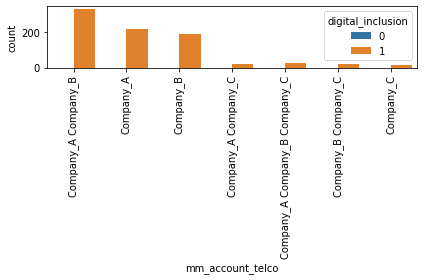

In [ ]:
sns.countplot(x="mm_account_telco", hue="digital_inclusion", data=dataset_1)
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()
plt.show()

Among all the dataset, Its company A and B indeed, the ones that are preferred among the clients that are digital included

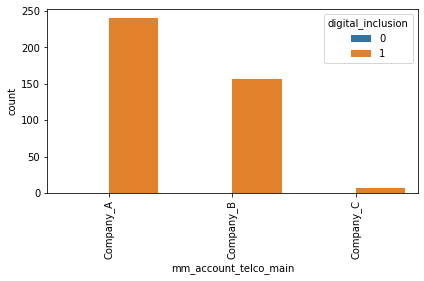

In [ ]:
sns.countplot(x="mm_account_telco_main", hue="digital_inclusion", data=dataset_1)
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()
plt.show()

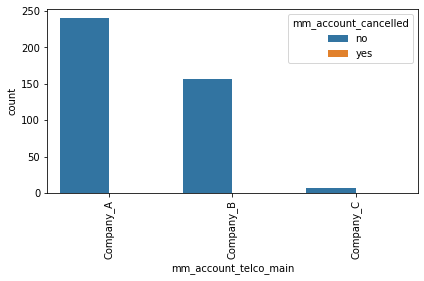

In [ ]:
sns.countplot(x="mm_account_telco_main", hue="mm_account_cancelled", data=dataset_1)
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#df1 = df.highest_grade_completed.groupby([df.highest_grade_completed, df.mm_account_cancelled]).size().unstack().fillna(0).astype(str)

#df1.index.name = None
#df1.columns.name = None
#print(df1)

In [ ]:
df.groupby('mm_account_telco')['mm_account_cancelled'].value_counts().unstack().fillna(0)

mm_account_cancelled,no
mm_account_telco,
Company_A,532
Company_A Company_B,838
Company_A Company_B Company_C,67
Company_A Company_C,55
Company_B,401
Company_B Company_C,45
Company_C,26


In [ ]:
dataset_1.mm_account_cancelled.value_counts(normalize= True)

no     0.851452
yes    0.148548
Name: mm_account_cancelled, dtype: float64

In [ ]:
dataset_1.mm_account_telco.value_counts()

Company_A Company_B              331
Company_A                        218
Company_B                        191
Company_A Company_B Company_C     25
Company_A Company_C               23
Company_B Company_C               23
Company_C                         14
Name: mm_account_telco, dtype: int64

In [ ]:
dataset_1.isnull().sum()

start_time                    0
end_time                      0
hhid                          0
account_num                   0
account_type                  0
weight                        0
district                      0
urban                         0
gender                        0
age                           0
hh_members                    0
highest_grade_completed     131
mm_account_cancelled          0
prefer_cash                  26
mm_trust                     92
mm_account_telco            380
mm_account_telco_main       800
v234                        429
agent_trust                 499
v236                        943
v237                        228
v238                        222
v240                        222
v241                        254
v242                        263
v243                        228
v244                        952
v245                        228
v246                        222
account_type_index            0
tmp_idx                       0
account_

In [ ]:
dataset_1.v234.value_counts()

yes    591
no     177
-97      8
Name: v234, dtype: int64

In [ ]:
dataset_1.v234.isnull().sum()

429

In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 2438
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_time               1205 non-null   object 
 1   end_time                 1205 non-null   object 
 2   hhid                     1205 non-null   int64  
 3   account_num              1205 non-null   int64  
 4   account_type             1205 non-null   object 
 5   weight                   1205 non-null   float64
 6   district                 1205 non-null   object 
 7   urban                    1205 non-null   object 
 8   gender                   1205 non-null   object 
 9   age                      1205 non-null   int64  
 10  hh_members               1205 non-null   int64  
 11  highest_grade_completed  1074 non-null   object 
 12  mm_account_cancelled     1205 non-null   object 
 13  prefer_cash              1179 non-null   object 
 14  mm_trust                

In [ ]:
dataset_1.highest_grade_completed.value_counts()

primary 6      319
secondary 6    105
primary 5      101
primary 4      100
primary 3       94
university      72
primary 2       65
secondary 3     60
secondary 2     36
primary 1       27
secondary 4     25
tvet            25
secondary 1     19
secondary 5     19
other            7
Name: highest_grade_completed, dtype: int64

In [ ]:
#print(dataset_1.pivot(index='highest_grade_completed',columns='account_type_0')[['account_type_index']])

In [ ]:
#pd.pivot_table(dataset_1, index =["highest_grade_completed"])

In [ ]:
dataset_1.groupby(["highest_grade_completed", "financially_excluded"]).size()

highest_grade_completed  financially_excluded
other                    0                         6
                         1                         1
primary 1                0                        20
                         1                         7
primary 2                0                        56
                         1                         9
primary 3                0                        79
                         1                        15
primary 4                0                        86
                         1                        14
primary 5                0                        90
                         1                        11
primary 6                0                       295
                         1                        24
secondary 1              0                        18
                         1                         1
secondary 2              0                        32
                         1                         4


The following distribution shows us that the more educated the people, the more they become digital included. 

In [ ]:
dataset_1.groupby(["highest_grade_completed", "digital_inclusion"]).size()

highest_grade_completed  digital_inclusion
other                    0                      3
                         1                      4
primary 1                0                     14
                         1                     13
primary 2                0                     33
                         1                     32
primary 3                0                     39
                         1                     55
primary 4                0                     39
                         1                     61
primary 5                0                     28
                         1                     73
primary 6                0                     92
                         1                    227
secondary 1              0                      4
                         1                     15
secondary 2              0                      9
                         1                     27
secondary 3              0                      9
       

In [ ]:
dataset_1.highest_grade_completed.value_counts(normalize= True)

primary 6      0.297020
secondary 6    0.097765
primary 5      0.094041
primary 4      0.093110
primary 3      0.087523
university     0.067039
primary 2      0.060521
secondary 3    0.055866
secondary 2    0.033520
primary 1      0.025140
secondary 4    0.023277
tvet           0.023277
secondary 1    0.017691
secondary 5    0.017691
other          0.006518
Name: highest_grade_completed, dtype: float64

It also can be seen that among the non-digital included users there have been 50% 50% chances to cancel a mobile money account. It may be worth to explore other demographic variables like urban


In [ ]:
dataset_1.groupby(["digital_inclusion","mm_account_cancelled"]).size()

digital_inclusion  mm_account_cancelled
0                  no                      199
                   yes                     179
1                  no                      827
dtype: int64

In [ ]:
#print(dataset_1.pivot(index='digital_inclusion', columns='mm_account_cancelled'))
pd.pivot_table(dataset_1, values = None, index=['digital_inclusion'], columns = 'mm_account_cancelled').reset_index()

digital_inclusion account_num  ...      weight            
mm_account_cancelled                            no  ...          no         yes
0                                    0         1.0  ...  769.934809  469.907987
1                                    1         1.0  ...  355.787488         NaN

[2 rows x 15 columns]

In [ ]:
dataset_1.urban.value_counts()

Rural    940
Urban    265
Name: urban, dtype: int64

Given the information belo, by conducting some descriptives, we can see that there is a 0.17 percentage of people that have cancelled their mobile money account in the rural area compared to the 0.06% that have cancelled their mobile money account in the urban area.

In [ ]:
dataset_1.groupby(["mm_account_cancelled", "urban"]).size()

mm_account_cancelled  urban
no                    Rural    777
                      Urban    249
yes                   Rural    163
                      Urban     16
dtype: int64

In [ ]:
222/1205

0.18423236514522823

In [ ]:
print('Percent of missing "v240" records is %.2f%%' %((dataset_1['v240'].isnull().sum()/dataset_1.shape[0])*100))

Percent of missing "v240" records is 0.00%


Have a transaction ever failed to go through (yes: 1 or not :0
no     0.80083
yes    0.19917
Name: v240, dtype: float64


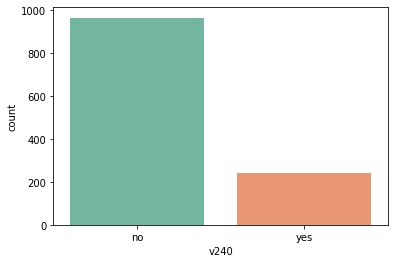

In [ ]:
print('Have a transaction ever failed to go through (yes: 1 or not :0')
print(dataset_1['v240'].value_counts(normalize = True))
sns.countplot(x='v240', data=dataset_1, palette='Set2')
plt.show()

In [14]:
dataset_1["v240"].fillna(dataset_1['v240'].value_counts().idxmax(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Continuing the exploration of variables and their relationship among them, there is something that is worth exploring: whether the population is either urban or rural and if they ever experiended a crashed transaction via the mobile money account. Before seeing some pattern, v240 (crashed transaction) has missing values. I chose to impute given the max value into the variables. 

After doing that, I realized that 65% of the population that said that their transactions failed in the past are from the rural area. It may be worth it to explore if there is something in the system that make this users experience this failure.


In [ ]:
print('Have a transaction ever failed to go through (yes: 1 or not :0')
dataset_1.groupby(["v240", "urban"]).size()

Have a transaction ever failed to go through (yes: 1 or not :0


v240  urban
no    Rural    785
      Urban    180
yes   Rural    155
      Urban     85
dtype: int64

In [ ]:
dataset_1.groupby(["digital_inclusion", "urban"]).size()

digital_inclusion  urban
0                  Rural    339
                   Urban     39
1                  Rural    601
                   Urban    226
dtype: int64

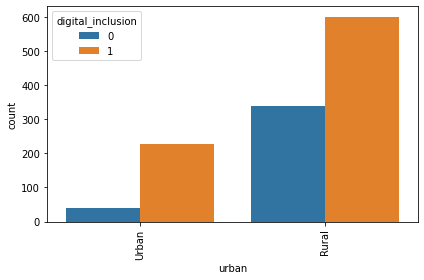

In [ ]:
sns.countplot(x="urban", hue="digital_inclusion", data=dataset_1)
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
dataset_1.groupby(["digital_inclusion", "gender"]).size()

digital_inclusion  gender
0                  female    270
                   male      108
1                  female    425
                   male      402
dtype: int64

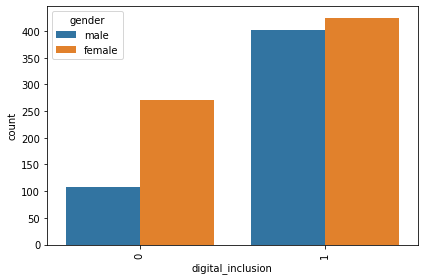

In [ ]:
sns.countplot(x="digital_inclusion", hue="gender", data=dataset_1)
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()
plt.show()

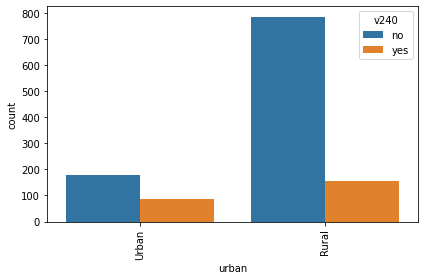

In [ ]:
sns.countplot(x="urban", hue="v240", data=dataset_1)
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()
plt.show()

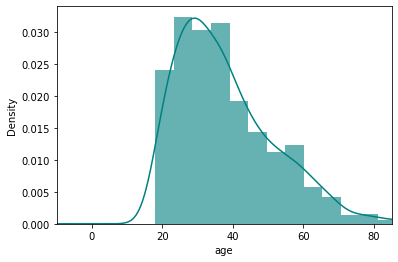

In [ ]:

ax = dataset_1["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
dataset_1["age"].plot(kind='density', color='teal')
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

**Exploration of Age**

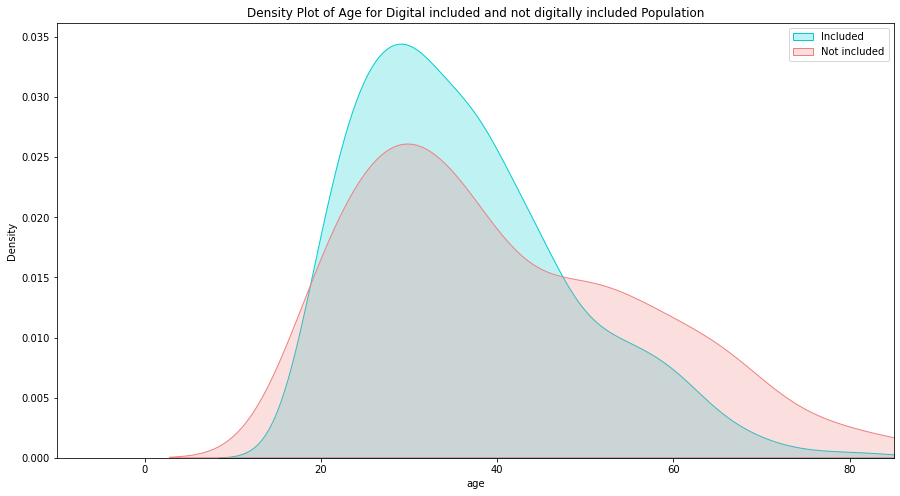

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset_1["age"][dataset_1.digital_inclusion == 1], color="darkturquoise", shade=True)
sns.kdeplot(dataset_1["age"][dataset_1.digital_inclusion == 0], color="lightcoral", shade=True)
plt.legend(['Included', 'Not included'])
plt.title('Density Plot of Age for Digital included and not digitally included Population')
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

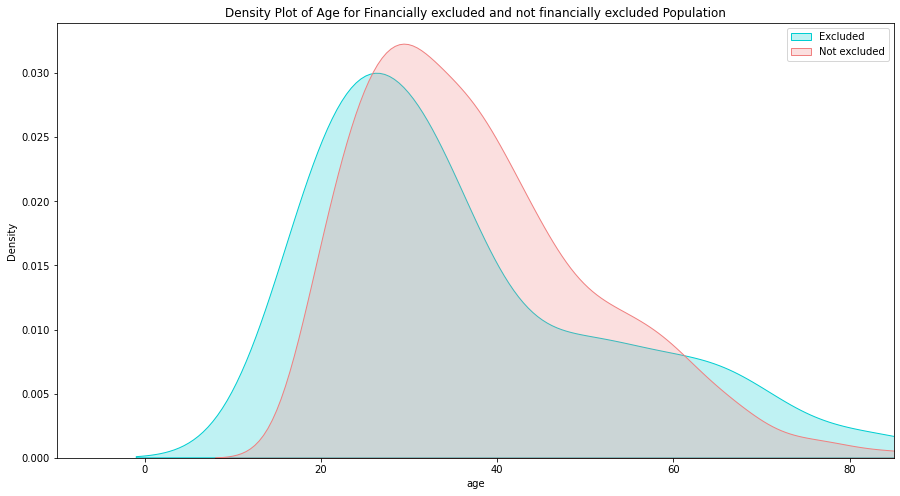

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset_1["age"][dataset_1.financially_excluded == 1], color="darkturquoise", shade=True)
sns.kdeplot(dataset_1["age"][dataset_1.financially_excluded == 0], color="lightcoral", shade=True)
plt.legend(['Excluded', 'Not excluded'])
plt.title('Density Plot of Age for Financially excluded and not financially excluded Population')
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

Besides, age, number of houselhold members is another continous variable that may have an impact in whether a person is financially excluded or not. Surprisingly, there is no difference in terms of proportion of people regarding the number of households. 

In [ ]:
dataset_1.hh_members.value_counts()

5     250
4     249
3     193
6     162
2     114
7     103
8      51
1      37
9      25
11      8
10      8
13      2
12      2
18      1
Name: hh_members, dtype: int64

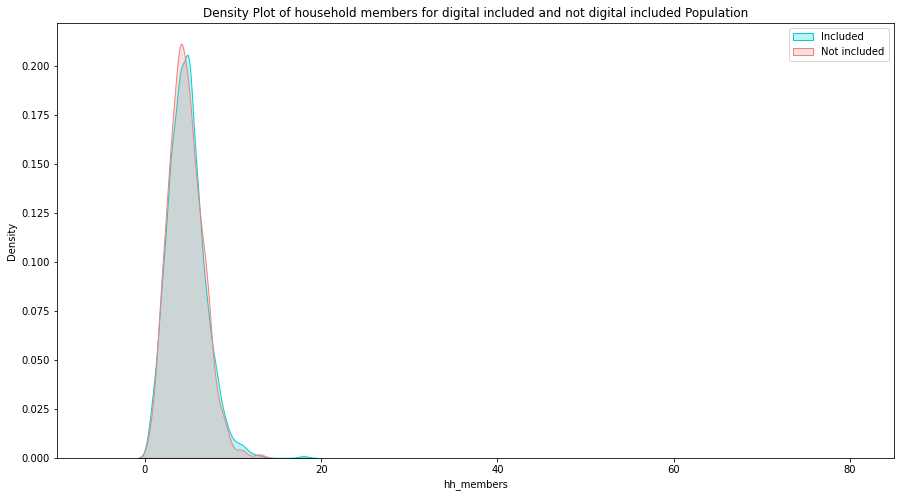

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset_1["hh_members"][dataset_1.digital_inclusion == 1], color="darkturquoise", shade=True)
sns.kdeplot(dataset_1["hh_members"][dataset_1.digital_inclusion == 0], color="lightcoral", shade=True)
plt.legend(['Included', 'Not included'])
plt.title('Density Plot of household members for digital included and not digital included Population')
ax.set(xlabel='hh_members')
plt.xlim(-10,85)
plt.show()

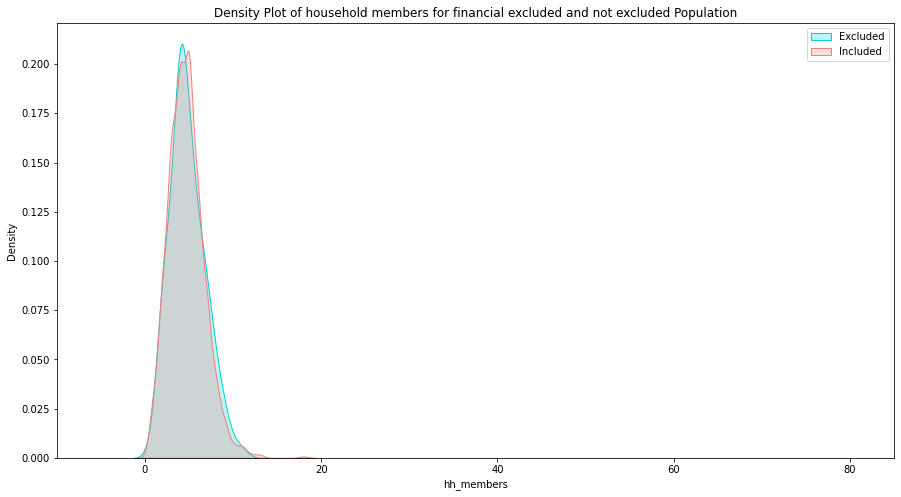

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset_1["hh_members"][dataset_1.financially_excluded == 1], color="darkturquoise", shade=True)
sns.kdeplot(dataset_1["hh_members"][dataset_1.financially_excluded == 0], color="lightcoral", shade=True)
plt.legend(['Excluded', 'Included'])
plt.title('Density Plot of household members for financial excluded and not excluded Population')
ax.set(xlabel='hh_members')
plt.xlim(-10,85)
plt.show()

***Question 4 ***asks for finding statistical differences in the share of customers who have experienced failed mobile money transactions in rural and urban villages. For that we need first to load packages and later, doing some data transformation for establishing the different groups to compare. 

In [15]:
from scipy.stats import ttest_ind #to run the t-test for independent samples
from scipy import stats
from scipy.stats import spearmanr #to run spearman

In [ ]:
#dataset_1[dataset_1['v240'].notna()]

In [ ]:
dataset_1.v240.value_counts(normalize=True)

no     0.755849
yes    0.244151
Name: v240, dtype: float64

In [ ]:
dataset_1.urban.value_counts()

Rural    940
Urban    265
Name: urban, dtype: int64

In [16]:
dataset_1["urban"] = dataset_1["urban"].map({"Urban":1, "Rural":0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 2438
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_time               1205 non-null   object 
 1   end_time                 1205 non-null   object 
 2   hhid                     1205 non-null   int64  
 3   account_num              1205 non-null   int64  
 4   account_type             1205 non-null   object 
 5   weight                   1205 non-null   float64
 6   district                 1205 non-null   object 
 7   urban                    1205 non-null   int64  
 8   gender                   1205 non-null   object 
 9   age                      1205 non-null   int64  
 10  hh_members               1205 non-null   int64  
 11  highest_grade_completed  1074 non-null   object 
 12  mm_account_cancelled     1205 non-null   object 
 13  prefer_cash              1179 non-null   object 
 14  mm_trust                

In [ ]:
#df['Sex'] = df['Sex'].map({"Female": 0, "Male": 1})
#dataset_1['urban'] = dataset_1['urban'].map({"Rural": 0, "Urban": 1})
#df['Sex'] = df['Sex'].apply({'Male':1, 'Female': 0}.get)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
dataset_1["v240"] = dataset_1["v240"].map({"no":0, "yes":1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
#Rural = dataset_1[dataset_1['urban']==0]
#Urban = dataset_1[dataset_1['urban']==1]


Rural = dataset_1[dataset_1['urban']==0]
Urban = dataset_1[dataset_1['urban']==1]

Once we have done all the preprocessing needed, we can compare the two independent groups (Rural vs Urban) given a possible failed mobile transaction. Given the result of the p-value, we can say that indeed, there is a statical difference (the p-value is less than 0.05) between rural vs urban areas regarding failed mobile transaction. Its is not the same experience for both groups, so there may be something to do about. I have previously ran a relationship between failed mobile transcation and region, having rural more crashes in this sense than urban, when they responded yes to crashes.

In [19]:
#let's see if rural are more or less likely to v240 than urban
ttest_ind(Rural['v240'], Urban['v240'], nan_policy='omit')

Ttest_indResult(statistic=-5.681163093697762, pvalue=1.676651719854841e-08)